In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split

In [3]:
#Loading the dataset
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [4]:
#Importing the dataset into a pandas dataframe
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [5]:
#Adding the headers to the dataframe, as mentioned in the project scenario.
headers=["age","gender","bmi","no_of_children","smoker","region","charges"]
df.columns=headers
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [6]:
#Replacing the '?' entries with 'NaN' values.
df.replace("?",np.nan,inplace=True)

In [7]:
#identifying the columns that have some 'Null' (or NaN) information using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [8]:
#Converting the NAN values to some relevant data(missing age=>mean age, missing data for smoker column=>most frequent value i.e. 0 or 1)
df["age"].replace(np.nan,df["age"].astype("float").mean(axis=0),inplace=True)
df["smoker"].replace(np.nan,df["smoker"].value_counts().idxmax(),inplace=True)
df[["age","smoker"]] = df[["age","smoker"]].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


In [9]:
#the charges column has values which are more than 2 decimal places long. Updating the charges column such that all values are rounded to nearest 2 decimal places.
df["charges"]=np.round(df["charges"],2)

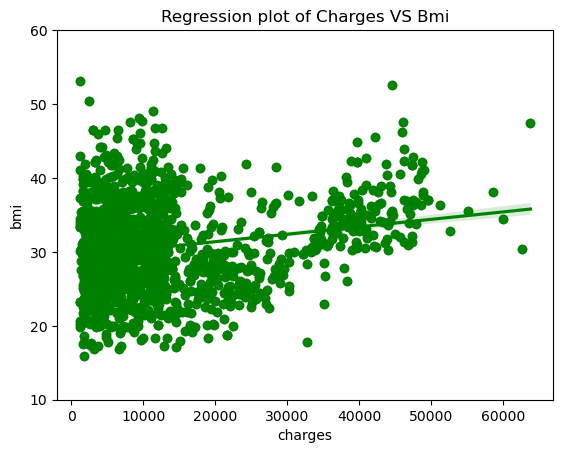

In [10]:
#Implementing the regression plot for better understanding
sns.regplot(x="charges",y="bmi",data=df,color="g")
plt.ylim(10,60)
plt.title("Regression plot of Charges VS Bmi")
plt.show()

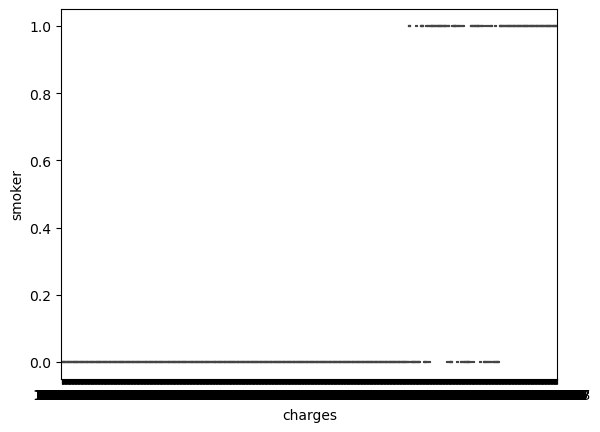

In [11]:
sns.boxplot(x="charges",y="smoker",data=df)
plt.show()

In [12]:
#correlation matrix 
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [13]:
#Model Development
#Fitting a linear regression model that may be used to predict the charges value by using the smoker attribute of the dataset.
X=df[["smoker"]]
Y=df["charges"]
lm=LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))#R-squared value
yhat=lm.predict(X)
yhat[0:10]


0.6221791733924185


array([32223.13982269,  8417.87439312,  8417.87439312,  8417.87439312,
        8417.87439312,  8417.87439312,  8417.87439312,  8417.87439312,
        8417.87439312,  8417.87439312])

In [14]:
#Fitting a linear regression model that may be used to predict the charges value by using all other attributes of the dataset
Z=df[["age","gender","bmi","no_of_children","smoker","region"]]
lm.fit(Z,Y)
lm.score(Z,Y)#R-squared value

0.7504083820289634

In [15]:
#Creating a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset
Input=[("scale",StandardScaler()),("polynomial",PolynomialFeatures()),("model",LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,Y)
yhat=pipe.predict(Z)
print(r2_score(Y,yhat))

0.8452574994441863


In [16]:
#Splitting the data into training and testing subsets, assuming that 20% of the data will be reserved for testing(just an assumption).
x_train,x_test,y_train,y_test=train_test_split(Z,Y,test_size=0.2,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])


2217
555


In [17]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat=RidgeModel.predict(x_test)
print(yhat[0:10])
print("\n")
print(r2_score(y_test,yhat))

[ 3.36239578e+04  2.05267061e+03  8.57740601e+03  3.37111147e+03
  2.97575871e+04  2.78819796e+03  3.23868238e+04  4.45330069e+00
 -1.13365022e+03  1.55324961e+04]


0.6760807731582406


In [18]:
#Applying polynomial transformation to the training parameters with degree=2. 
#Using this transformed feature set to fit and predict the same regression model, as above (using the training subset.)
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608056
